# 14.2. Drawing flight routes with NetworkX

In [1]:
import math
import json
import numpy as np
import pandas as pd
import networkx as nx
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [2]:
names = ('airline,airline_id,'
         'source,source_id,'
         'dest,dest_id,'
         'codeshare,stops,equipment').split(',')

In [3]:
routes = pd.read_csv(
    'https://github.com/ipython-books/'
    'cookbook-2nd-data/blob/master/'
    'routes.dat?raw=true',
    names=names,
    header=None)
routes

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
5,2B,410,DME,4029,KZN,2990,NaN,0,CR2
6,2B,410,DME,4029,NBC,6969,NaN,0,CR2
7,2B,410,DME,4029,TGK,\N,NaN,0,CR2
8,2B,410,DME,4029,UUA,6160,NaN,0,CR2
9,2B,410,EGO,6156,KGD,2952,NaN,0,CR2


In [4]:
names = ('id,name,city,country,iata,icao,lat,lon,'
         'alt,timezone,dst,tz,type,source').split(',')

In [5]:
airports = pd.read_csv(
    'https://github.com/ipython-books/'
    'cookbook-2nd-data/blob/master/'
    'airports.dat?raw=true',
    header=None,
    names=names,
    index_col=4,
    na_values='\\N')
airports_us = airports[airports['country'] ==
                       'United States']
airports_us

,id,name,city,country,icao,lat,lon,alt,timezone,dst,tz,type,source
iata,,,,,,,,,,,,,
BTI,3411,Barter Island LRRS Airport,Barter Island,United States,PABA,70.134003,-143.582001,2,-9.0,A,America/Anchorage,airport,OurAirports
LUR,3413,Cape Lisburne LRRS Airport,Cape Lisburne,United States,PALU,68.875099,-166.110001,16,-9.0,A,America/Anchorage,airport,OurAirports
PIZ,3414,Point Lay LRRS Airport,Point Lay,United States,PPIZ,69.732903,-163.005005,22,-9.0,A,America/Anchorage,airport,OurAirports
ITO,3415,Hilo International Airport,Hilo,United States,PHTO,19.721399,-155.048004,38,-10.0,N,Pacific/Honolulu,airport,OurAirports
ORL,3416,Orlando Executive Airport,Orlando,United States,KORL,28.545500,-81.332901,113,-5.0,A,America/New_York,airport,OurAirports
BTT,3417,Bettles Airport,Bettles,United States,PABT,66.913902,-151.529007,647,-9.0,A,America/Anchorage,airport,OurAirports
Z84,3418,Clear Airport,Clear Mews,United States,PACL,64.301201,-149.119995,552,-9.0,A,America/Anchorage,airport,OurAirports
UTO,3419,Indian Mountain LRRS Airport,Indian Mountains,United States,PAIM,65.992798,-153.703995,1273,-9.0,A,America/Anchorage,airport,OurAirports
FYU,3420,Fort Yukon Airport,Fort Yukon,United States,PFYU,66.571503,-145.250000,433,-9.0,A,America/Anchorage,airport,OurAirports


In [6]:
routes_us = routes[
    routes['source'].isin(airports_us.index) &
    routes['dest'].isin(airports_us.index)]
routes_us

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
172,2O,146,ADQ,3531,KLN,7162,NaN,0,BNI
177,2O,146,KLN,7162,KYK,7161,NaN,0,BNI
260,3E,10739,BRL,5726,ORD,3830,NaN,0,CNC
261,3E,10739,BRL,5726,STL,3678,NaN,0,CNC
262,3E,10739,DEC,4042,ORD,3830,NaN,0,CNC
263,3E,10739,DEC,4042,STL,3678,NaN,0,CNC
264,3E,10739,JBR,3591,STL,3678,NaN,0,CNC
265,3E,10739,ORD,3830,BRL,5726,NaN,0,CNC
266,3E,10739,ORD,3830,DEC,4042,NaN,0,CNC
267,3E,10739,STL,3678,BRL,5726,NaN,0,CNC


In [7]:
edges = routes_us[['source', 'dest']].values
edges

array([['ADQ', 'KLN'],
       ['KLN', 'KYK'],
       ['BRL', 'ORD'],
       ...,
       ['SOW', 'PHX'],
       ['VIS', 'LAX'],
       ['WRL', 'CYS']], dtype=object)

In [8]:
g = nx.from_edgelist(edges)

In [9]:
len(g.nodes()), len(g.edges())

(546, 2781)

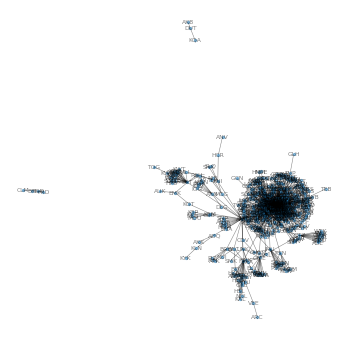

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(g, ax=ax, node_size=5,
                 font_size=6, alpha=.5,
                 width=.5)
ax.set_axis_off()

In [11]:
sg = next(nx.connected_component_subgraphs(g))

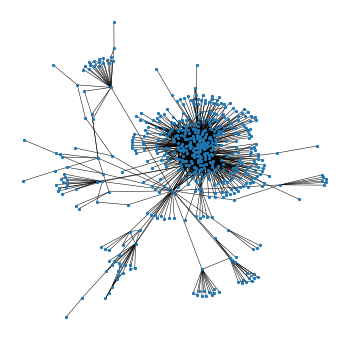

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(sg, ax=ax, with_labels=False,
                 node_size=5, width=.5)
ax.set_axis_off()

In [65]:
airports_us = airports_us.reset_index().drop_duplicates(subset='iata', keep='last').set_index('iata')
pos = {airport: (v['lon'], v['lat'])
       for airport, v in
       airports_us.to_dict('index').items()}

In [66]:
deg = nx.degree(sg)
sizes = [5 * deg[iata] for iata in sg.nodes]

In [67]:
altitude = airports_us['alt']
altitude = [altitude[iata] for iata in sg.nodes]

In [68]:
labels = {iata: iata if deg[iata] >= 20 else ''
          for iata in sg.nodes}

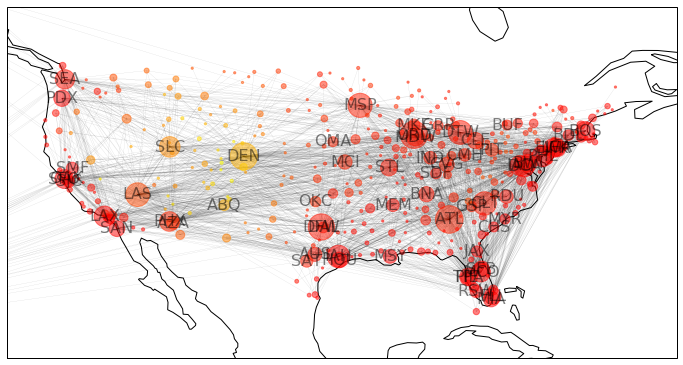

In [69]:
# Map projection
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(
    1, 1, figsize=(12, 8),
    subplot_kw=dict(projection=crs))
ax.coastlines()
# Extent of continental US.
ax.set_extent([-128, -62, 20, 50])
nx.draw_networkx(sg, ax=ax,
                 font_size=16,
                 alpha=.5,
                 width=.075,
                 node_size=sizes,
                 labels=labels,
                 pos=pos,
                 node_color=altitude,
                 cmap=plt.cm.autumn)